# Prediction Long-Term of Solar Radiation at Antarctica

In [98]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Extraction 

In [99]:
solar = pd.read_csv('DGSR_Data.csv')

In [100]:
solar.shape

(9749, 4)

In [101]:
solar.head()

Year  Month  Day  Estimated_DGSR
0  1989      3    1       10.157780
1  1989      3    2        5.944928
2  1989      3    3       13.550971
3  1989      3    4        5.153736
4  1989      3    5        9.636340

In [102]:
solar.describe()

Year        Month          Day  Estimated_DGSR
count  9749.000000  9749.000000  9749.000000     9749.000000
mean   2004.309981     6.544569    15.889117       11.767023
std       9.049216     3.708609     8.738479       10.914244
min    1989.000000     1.000000     1.000000       -2.163472
25%    1996.000000     3.000000     8.000000        1.703683
50%    2004.000000     7.000000    16.000000        8.336705
75%    2012.000000    10.000000    23.000000       21.102639
max    2020.000000    12.000000    31.000000       35.723000

In [103]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9749 entries, 0 to 9748
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            9749 non-null   int64  
 1   Month           9749 non-null   int64  
 2   Day             9749 non-null   int64  
 3   Estimated_DGSR  9749 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 304.8 KB


## Transform Data 

In [104]:
solar['Estimated_DGSR'] = solar['Estimated_DGSR'].astype(int)
solar.head()

Year  Month  Day  Estimated_DGSR
0  1989      3    1              10
1  1989      3    2               5
2  1989      3    3              13
3  1989      3    4               5
4  1989      3    5               9

## Random Forest Model 

In [105]:
df = pd.DataFrame(solar)
df.head()

Year  Month  Day  Estimated_DGSR
0  1989      3    1              10
1  1989      3    2               5
2  1989      3    3              13
3  1989      3    4               5
4  1989      3    5               9

In [106]:
#split data
X = df.drop('Estimated_DGSR', axis = 1)
y = df['Estimated_DGSR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6824, 3)
(6824,)
(2925, 3)
(2925,)


In [107]:
#generate model
rf = RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state = 2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=2)

In [108]:
#prediciton
prediction = rf.predict(X_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [109]:
#accuracy score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')

Accuracy Score :  0.19794871794871796
Percentage :  19 %


In [110]:
#confusion matrix
confusion_matrix = pd.crosstab(y_test, prediction, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted    0   2  3  6
Actual                  
-1           1   0  0  0
 0         565   0  0  0
 1         220   1  0  0
 2         150  11  1  0
 3         134   3  0  0
 4         107   2  0  0
 5         101   0  0  0
 6          74   0  0  3
 7          68   0  0  1
 8          60   0  0  0
 9          71   0  1  0
 10         62   0  0  0
 11         45   0  0  3
 12         72   0  0  0
 13         57   0  0  0
 14         68   0  0  0
 15         56   0  0  0
 16         65   0  0  0
 17         55   0  0  0
 18         59   0  0  0
 19         49   0  0  0
 20         37   0  0  0
 21         51   0  0  0
 22         52   0  0  0
 23         62   0  0  0
 24         70   0  0  0
 25         56   0  0  0
 26         45   0  0  0
 27         51   0  0  0
 28         44   0  0  0
 29         48   0  0  0
 30         52   0  0  0
 31         79   0  0  0
 32         34   0  0  0
 33         39   0  0  0
 34         38   0  0  0
 35          2   0  0  0


In [111]:
#classification report
report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.19      1.00      0.33       565
           1       0.00      0.00      0.00       221
           2       0.65      0.07      0.12       162
           3       0.00      0.00      0.00       137
           4       0.00      0.00      0.00       109
           5       0.00      0.00      0.00       101
           6       0.43      0.04      0.07        77
           7       0.00      0.00      0.00        69
           8       0.00      0.00      0.00        60
           9       0.00      0.00      0.00        72
          10       0.00      0.00      0.00        62
          11       0.00      0.00      0.00        48
          12       0.00      0.00      0.00        72
          13       0.00      0.00      0.00        57
          14       0.00      0.00      0.00        68
          15       0.00      0.00      0.00        56
          16       0.00    

c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', 
                       max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
                       min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1, oob_score=False, 
                       random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(n_jobs=1)

In [113]:
#feature important
important = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(important)

Month    0.747812
Day      0.192442
Year     0.059746
dtype: float64


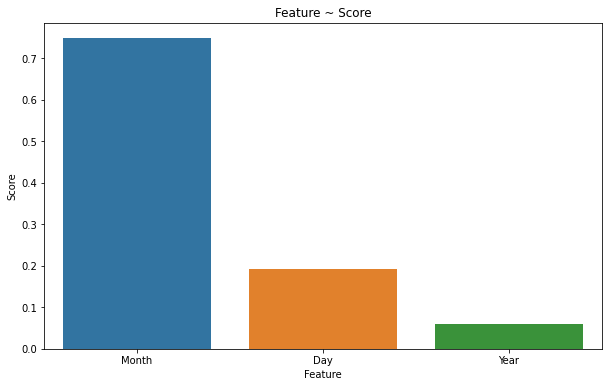

In [114]:
#barplot model important score feature
plt.figure(figsize=(10,6))
sns.barplot(x=important.index, y=important)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title("Feature ~ Score")
plt.show()

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


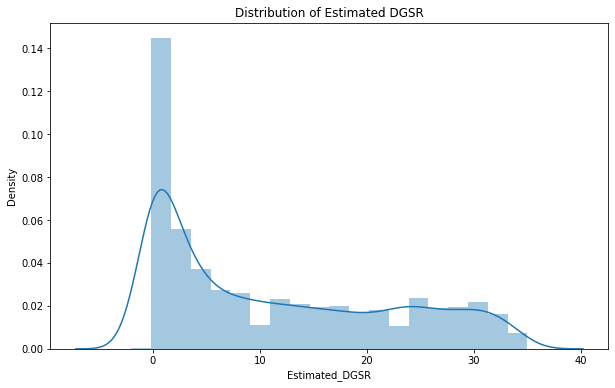

In [115]:
#distribution
plt.figure(figsize=(10,6))
sns.distplot(df.Estimated_DGSR)
plt.title("Distribution of Estimated DGSR")
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Estimated_DGSR'>

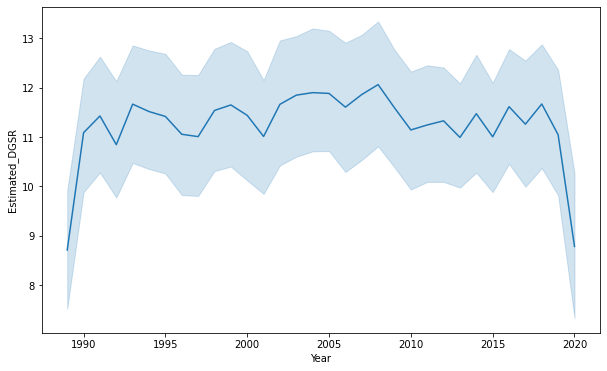

In [116]:
#lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Year", y="Estimated_DGSR")

Year     Month       Day  Estimated_DGSR
Year            1.000000 -0.040046 -0.002977        0.005913
Month          -0.040046  1.000000  0.023977        0.230741
Day            -0.002977  0.023977  1.000000       -0.021701
Estimated_DGSR  0.005913  0.230741 -0.021701        1.000000

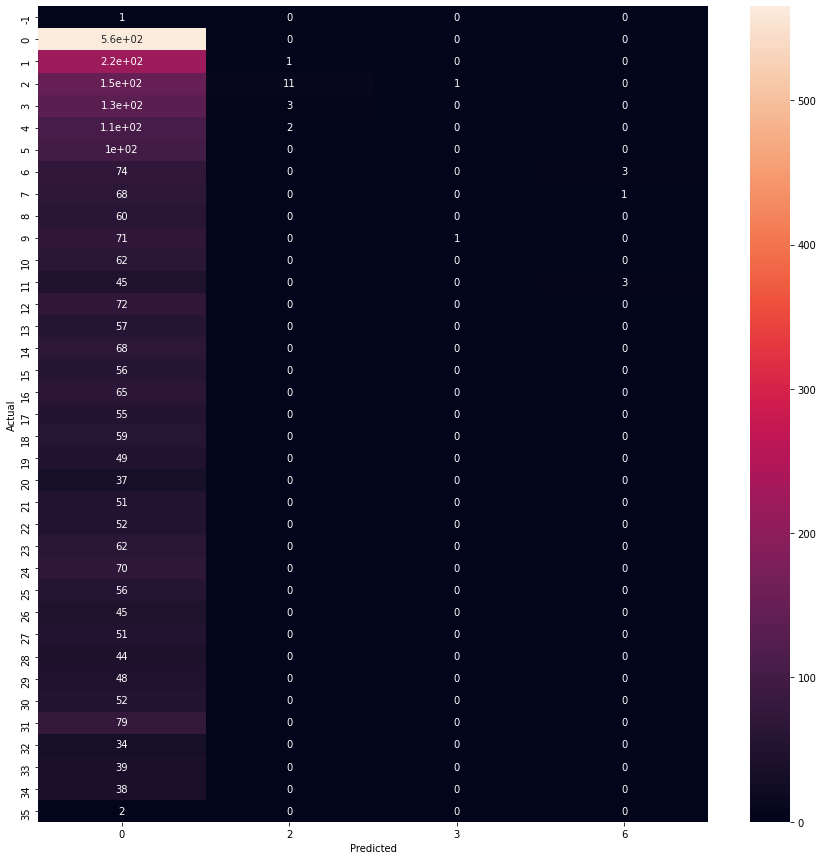

In [117]:
#heatmap correlation
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix, annot=True)
df.corr()